# boxplot()

# Outliers:
#### Data points that are significantly from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry or erroneous observations.
#### Eg.=age of person : 200 by mistake is a purely outlier.
## Extreme value either on right side or left side in the distribution , extreme means values in higher side or lower side outlier can not be in middle some where.

# outliers affects??
#### It affects ML accuracy where predictive line bend towards outlier
#### this outlier doesn't affects from analysis points of view

## outlier highly affect on some machine learning algorithm WHICH HAVE WEIGHTS
#### 1. linear models
#### 2. logistic models
#### 3. ada boost

# outlier detection techniques
#### 1. z-score when the data is normally distributed or close to normally distributed.
#### 2. boxplot when data is skewed
#### 3. percentile based (choose percentile limit like value>99% or value<5% than outlier)

# Usage of boxplot
## 1. Outlier detection 
## 2. 5 number summary (jo info() krne se milta hai)
## 3. univarient analysis 
## 4. multivarient analysisv/Bivariate:Seaborn

## boxplot is applicable for numeric data. It is basically works in percentile
## 100% is the maximum value 0% is minimum value 25% 50% 75%

# Boxplot can be used to:
# 1. Identify outliers or anomalous data points
# 2. To determine if out data is skewed
# 3. To understand the spread/range of the dataused to detect the outliers

In [3]:
import matplotlib.pyplot as plt # pyplot= pie plot
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
a=sns.load_dataset("tips")
a

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
# Detection of outlier in tips

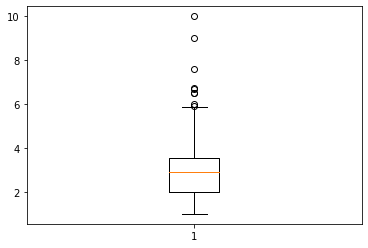

In [6]:
plt.boxplot(a["tip"]);

In [7]:
a["tip"].skew()

1.4654510370979401

In [8]:
a["tip"].describe().T

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

# Find percentile , quantile , lower limit , upper limit

# Percentile tells the proportion of population that falls below a value .

In [9]:
# finding upper limit and lower limit

In [10]:
np.percentile(a["tip"],[25,50,75])

array([2.    , 2.9   , 3.5625])

In [11]:
q1=a["tip"].quantile(0.25)
q1

2.0

In [12]:
q3=a["tip"].quantile(0.75)
q3

3.5625

In [13]:
iqr=q3-q1 # IQR = Inter quantile range
iqr

1.5625

In [14]:
upper_limit=q3+1.5*iqr
upper_limit

5.90625

In [15]:
lower_limit=q1-1.5*iqr
lower_limit

-0.34375

In [16]:
a[a["tip"]<lower_limit]

,total_bill,tip,sex,smoker,day,time,size


In [17]:
a[a["tip"]>upper_limit]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [18]:
b=a[(a["tip"]>lower_limit)&(a["tip"]<upper_limit)]# 
b

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [19]:
d=a.copy()
d

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [20]:
d["tip"]=np.where(d["tip"]>upper_limit,upper_limit,np.where(d["tip"]<lower_limit,lower_limit,a["tip"]))
d["tip"]

0      1.01000
1      1.66000
2      3.50000
3      3.31000
4      3.61000
        ...   
239    5.90625
240    2.00000
241    2.00000
242    1.75000
243    3.00000
Name: tip, Length: 244, dtype: float64

In [21]:
d["tip"].skew()

0.7067106704349628

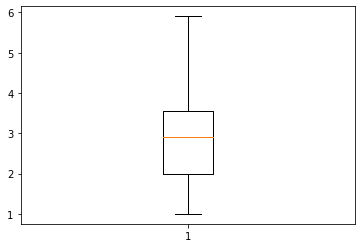

In [22]:
plt.boxplot(d["tip"]);